In [2]:
import neural_net_without_autograd as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  GridSearchCV, KFold, train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

Loading in data

In [3]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)

### Performance of best model from gridsearch

Calculating the test score and finding the confusion matrix for the best model found with gridsearch

In [4]:
# Define layer sizes and activations
network_input_size =  30
layer_output_sizes = [2]
activations = ['softmax'] 

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, 
                            layer_output_sizes, 
                            activations, 
                            epsilon=0.1,
                            batch_size=10, 
                            epochs=500, 
                            loss_fn='cross_entropy'))
])

# getting data for confusion matrix
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict_proba(X_test)

# Evauluate the model
accuracy = pipeline.score(X_train, y_train)
print(f'Train accuracy: {accuracy:.4f}')

accuracy = pipeline.score(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

Epoch 0: Accuracy = 0.9318681318681319
Epoch 100: Accuracy = 0.9912087912087912
Epoch 200: Accuracy = 0.989010989010989
Epoch 300: Accuracy = 0.9846153846153847
Epoch 400: Accuracy = 0.989010989010989
Train accuracy: 0.9890
Test accuracy: 0.9737


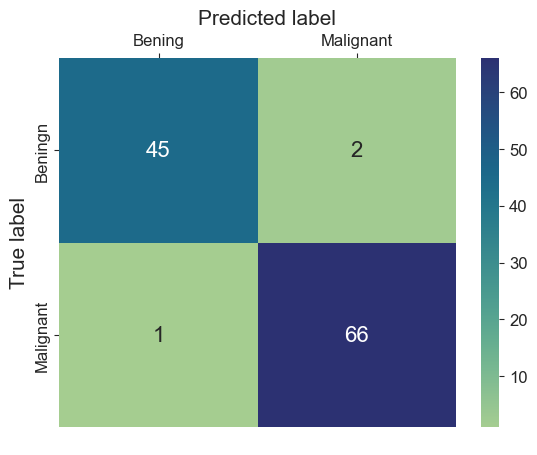

In [5]:
# plotting parameters
sns.set_style('whitegrid')
sns.set_palette('muted')
plt.rc('xtick', labelsize=12)  # Set x-tick label size
plt.rc('ytick', labelsize=12)  # Set y-tick label size


# Calculating the confusion matrix
cm = confusion_matrix(y_test, np.argmax(y_pred, -1))

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            annot_kws={"fontsize":16},
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'],
            cmap='crest')
plt.ylabel('True label', fontsize=15)
ax.set(xlabel=" ", ylabel="True label")
ax.xaxis.tick_top()
ax.yaxis.tick_left()

plt.gca().figure.text(0.45, 0.95, 'Predicted label', ha='center', fontsize=15)
plt.show()

### Gridsearch for finding optimal model parameters

In [15]:
# Grid search for learning rate and regularization
k_folds = KFold(n_splits=5)

network_input_size =  30
layer_output_sizes = [2]
activations = ['softmax'] 

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', NNC.NeuralNet(network_input_size, layer_output_sizes, activations, batch_size=10, epochs=500))
])
param_grid = {
    'model__epsilon': np.logspace(-4, -1, 4),
    'model__llambda': [0, 0.0001, 0.001, 0.01, 0.1],
}

grid_search = GridSearchCV(estimator=pipeline,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=k_folds,
                  verbose=3,
                  n_jobs=1)
gs = grid_search.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Epoch 0: Accuracy = 0.3489010989010989
Epoch 100: Accuracy = 0.5082417582417582
Epoch 200: Accuracy = 0.771978021978022
Epoch 300: Accuracy = 0.8434065934065934
Epoch 400: Accuracy = 0.8763736263736264
[CV 1/5] END model__epsilon=0.0001, model__llambda=0;, score=0.912 total time=   1.4s
Epoch 0: Accuracy = 0.6291208791208791
Epoch 100: Accuracy = 0.6483516483516484
Epoch 200: Accuracy = 0.8543956043956044
Epoch 300: Accuracy = 0.9148351648351648
Epoch 400: Accuracy = 0.9340659340659341
[CV 2/5] END model__epsilon=0.0001, model__llambda=0;, score=0.956 total time=   1.6s
Epoch 0: Accuracy = 0.6538461538461539
Epoch 100: Accuracy = 0.8324175824175825
Epoch 200: Accuracy = 0.8791208791208791
Epoch 300: Accuracy = 0.8846153846153846
Epoch 400: Accuracy = 0.8928571428571429
[CV 3/5] END model__epsilon=0.0001, model__llambda=0;, score=0.868 total time=   1.1s
Epoch 0: Accuracy = 0.3543956043956044
Epoch 100: Accuracy = 0.472527472

Saving the results

In [16]:
cv_results = grid_search.cv_results_

results_df = pd.DataFrame(cv_results)

# save data to csv-file
results_df.to_csv('Results/gridsearch_logistic_regression.csv', sep=',', encoding='utf-8')

## Comparing with Scikit-learn:

In [6]:
from sklearn.linear_model import LogisticRegression

In [7]:
pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('model', LogisticRegression(solver='lbfgs', max_iter=500))
])

pipeline.fit(X_train, y_train)
pipeline.score(X_test, y_test)

0.9649122807017544